In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

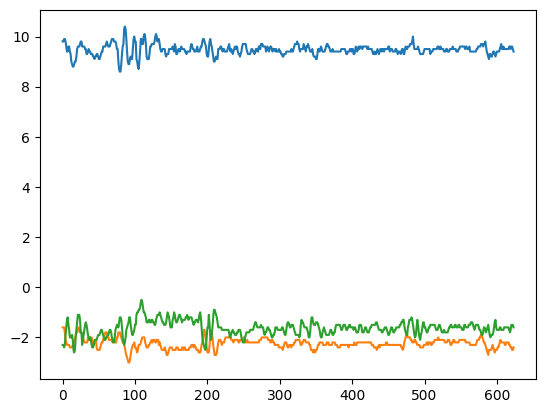

In [3]:
RutaFile="/content/gdrive/MyDrive/tallerDataSecuencial/testing/Normal.4cuvm0b6.ingestion-59dd99ddcd-hsbjs.json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [4]:
import os
directory = '/content/gdrive/MyDrive/tallerDataSecuencial/training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

Datos=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*624:(i+1)*624] = DatosOriNP
  i+=1
print(Datos.shape)



(15600, 3)


In [5]:
print(files)

['DHead.4cv0gree.ingestion-59dd99ddcd-lwcq6.json', 'DHead.4cv0hc85.ingestion-59dd99ddcd-hsbjs.json', 'DHead.4cv0huhm.ingestion-59dd99ddcd-btfk9.json', 'DHead.4cv0ikeo.ingestion-59dd99ddcd-lwcq6.json', 'DHead.4cv0j6db.ingestion-59dd99ddcd-hsbjs.json', 'Defense.4cv0brij.ingestion-59dd99ddcd-btfk9.json', 'Defense.4cv0ccdi.ingestion-59dd99ddcd-lwcq6.json', 'Defense.4cv0cv6d.ingestion-59dd99ddcd-hsbjs.json', 'Defense.4cv0djpd.ingestion-59dd99ddcd-btfk9.json', 'Defense.4cv0e4rm.ingestion-59dd99ddcd-lwcq6.json', 'Normal.4cuvikm9.ingestion-59dd99ddcd-btfk9.json', 'Normal.4cuvjkuc.ingestion-59dd99ddcd-lwcq6.json', 'Normal.4cuvk9k3.ingestion-59dd99ddcd-hsbjs.json', 'Normal.4cuvkrvi.ingestion-59dd99ddcd-btfk9.json', 'Normal.4cuvletk.ingestion-59dd99ddcd-lwcq6.json', 'Punch.4cuvoib3.ingestion-59dd99ddcd-lwcq6.json', 'Punch.4cuvp5au.ingestion-59dd99ddcd-hsbjs.json', 'Punch.4cuvpspv.ingestion-59dd99ddcd-btfk9.json', 'Punch.4cuvqfol.ingestion-59dd99ddcd-lwcq6.json', 'Punch.4cuvr2ub.ingestion-59dd99dd

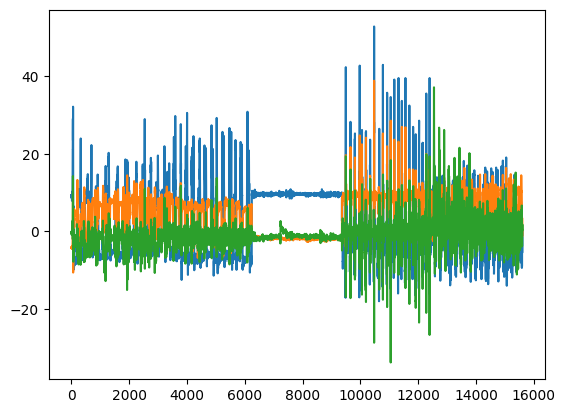

In [6]:
plt.plot(Datos)

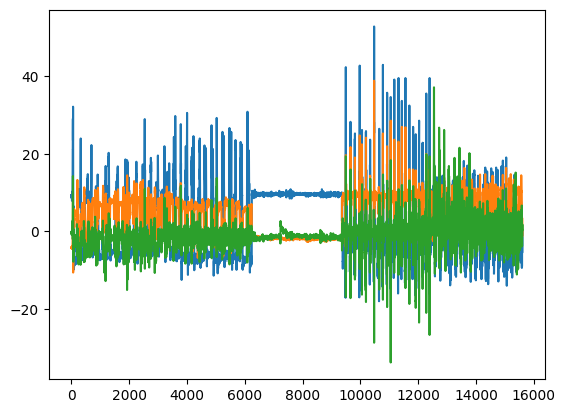

In [8]:
#scaler1 = MinMaxScaler()
#scaler1.fit(Datos)
#DatosN=scaler1.transform(Datos)
DatosN=Datos
plt.plot(DatosN)

como tengo (15600, 3)  , es 15600 / 104 ventanas   = 150

In [9]:
Xtrain=np.zeros((150,312))

for i in range(150):
    Xtrain[i,:]=np.concatenate((DatosN[i*104:(i+1)*104,0].T,DatosN[i*104:(i+1)*104,1].T,DatosN[i*104:(i+1)*104,2].T),axis=0)

print(Xtrain.shape)


(150, 312)


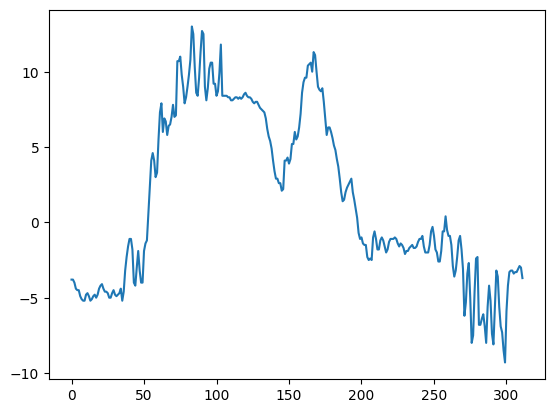

In [10]:
plt.plot(Xtrain[25,:])

150 / °n declases ->     150/5 = 30

ETIQUETAR EN ORDEN DE TRAININ DATA

In [11]:
YtrainIni=np.zeros((150,1))
for i in range(30):
    YtrainIni[i]=0 #DHead

for i in range(30,60):
    YtrainIni[i]=1 # Defense

for i in range(60,90):
    YtrainIni[i]=2 # Normal

for i in range(90,120):
    YtrainIni[i]=3 # Punch

for i in range(120,150):
    YtrainIni[i]=4 # PunchUp

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]


In [12]:
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                3130      
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 5)                 155       
                                                                 
Total params: 4135 (16.15 KB)
Trainable params: 4135 (16.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


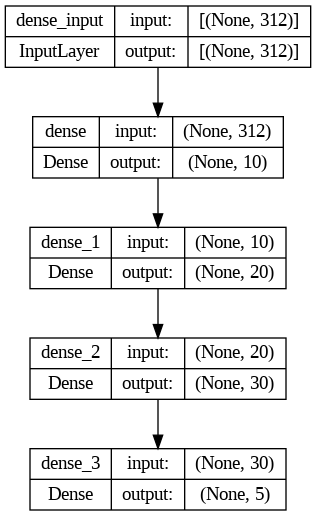

In [13]:

#Definición del modelo
modelo = Sequential()
modelo.add(Dense(10,input_shape=(312,),activation='relu'))
modelo.add(Dense(20,activation='relu'))
modelo.add(Dense(30,activation='relu'))
modelo.add(Dense(5, activation = 'softmax'))

modelo.summary()

keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [14]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain,Ytrain, epochs=1000,batch_size=None,verbose=0)


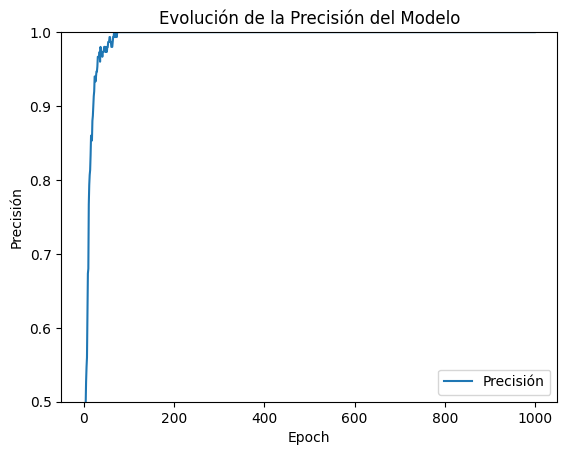

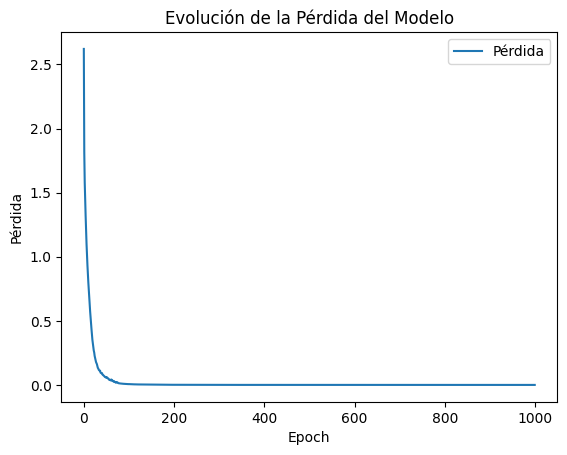

In [15]:
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

In [16]:
modelo.save('modelMLPBoxing.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


se puede ver modelo .h5 , solo subir el .h5 en : https://netron.app/

['DHead.4cv0jnqn.ingestion-59dd99ddcd-btfk9.json', 'DHead.4cv0kdkc.ingestion-59dd99ddcd-lwcq6.json', 'Defense.4cv0em4h.ingestion-59dd99ddcd-hsbjs.json', 'Defense.4cv0f70f.ingestion-59dd99ddcd-btfk9.json', 'Normal.4cuvm0b6.ingestion-59dd99ddcd-hsbjs.json', 'Normal.4cuvmjnu.ingestion-59dd99ddcd-btfk9.json', 'Punch.4cuvrmlo.ingestion-59dd99ddcd-btfk9.json', 'Punch.4cuvsbb9.ingestion-59dd99ddcd-btfk9.json', 'PunchUp.4cv100u7.ingestion-59dd99ddcd-hsbjs.json', 'PunchUp.4cv10i88.ingestion-59dd99ddcd-btfk9.json']
(6240, 3)


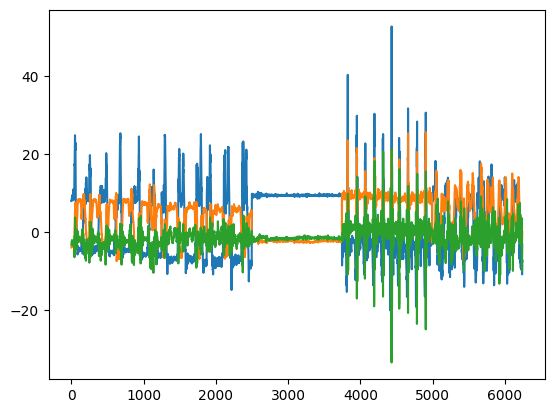

In [17]:
import os
directory = '/content/gdrive/MyDrive/tallerDataSecuencial/testing/'
files = os.listdir(directory)
files.sort()
print(files)
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*624:(i+1)*624] = DatosOriNP
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

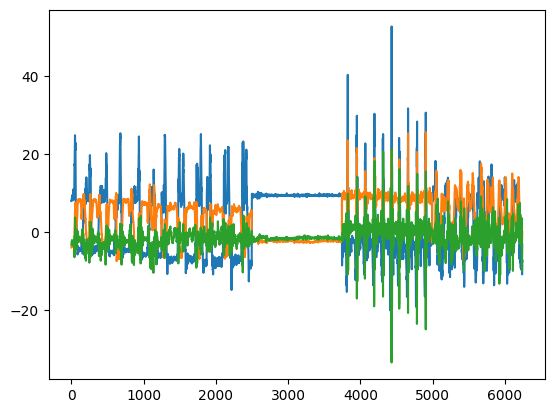

In [18]:
#scaler3 = MinMaxScaler()
#scaler3.fit(DatosVal)
#DatosValN=scaler3.transform(DatosVal)
DatosValN=DatosVal
plt.plot(DatosValN)

tengo (6240, 3)  6240 /104 ventanas = 60   ,   104 * 3 canales = 312

In [19]:
XVal=np.zeros((60,312))
for i in range(60):
    XVal[i,:]=np.concatenate((DatosValN[i*104:(i+1)*104,0].T,DatosValN[i*104:(i+1)*104,1].T,DatosValN[i*104:(i+1)*104,2].T),axis=0)

print(XVal.shape)



(60, 312)


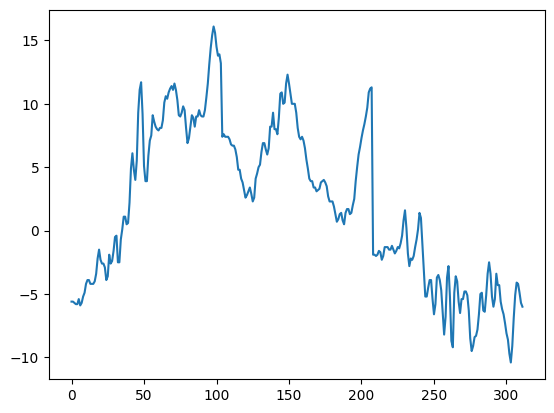

In [20]:
plt.plot(XVal[10,:])

60 / n clases  ->  60 / 5 = 12

In [21]:
YValIni=np.zeros((60,1))
for i in range(12):
    YValIni[i]=0  #Dhead

for i in range(12,24):
    YValIni[i]=1   # Defense

for i in range(24,36):
    YValIni[i]=2   #Normal

for i in range(36,48):
    YValIni[i]=3   #Punch

for i in range(48,60):
    YValIni[i]=4 #PunchUp

print(YValIni)
YVal= to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1

In [22]:
modelo.evaluate(XVal, YVal)

2/2 [==============================] - 0s 8ms/step - loss: 1.8346 - accuracy: 0.7167


[1.8346095085144043, 0.7166666388511658]

2/2 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        12
           1       0.50      0.42      0.45        12
           2       1.00      1.00      1.00        12
           3       0.82      0.75      0.78        12
           4       0.80      0.67      0.73        12

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60

[[ 9  3  0  0  0]
 [ 5  5  0  0  2]
 [ 0  0 12  0  0]
 [ 2  1  0  9  0]
 [ 1  1  0  2  8]]


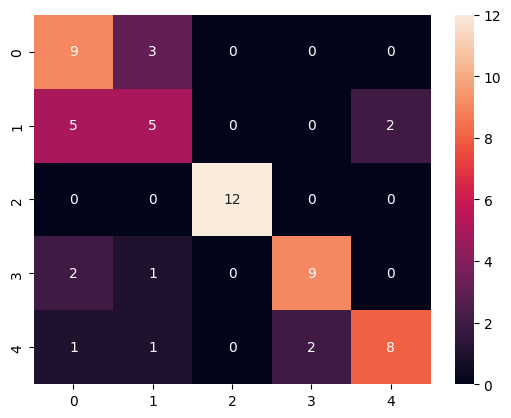

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1)
y_pred_class = np.argmax(ypredic,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")